In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse as sp
from scipy import fft
import scipy.sparse.linalg as linalg
import matplotlib.animation as animation
#%matplotlib tk

In [4]:
def laplacian2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([diag,-2*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(I,mat,format='csr')+sp.kron(mat,I, format="csr")#.toarray()

print(laplacian2D(4).toarray())

def plotheatmap(u_k, k, delta_t):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap="turbo", vmin=300, vmax=1000)
    plt.colorbar()

    return plt

def animate(k, u, delta_t):
    plotheatmap(u[k], k, delta_t)

def dst2(x):
    return fft.dst(fft.dst(x, axis=1), axis=0)

def idst2(x):
    return fft.idst(fft.idst(x, axis=1), axis=0)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

# a) Jacobi Iteration

break after iteration 505


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

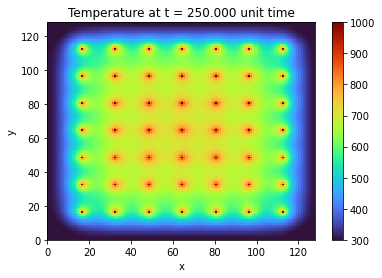

In [11]:
plate_length = 128
max_iter_time = 1000    
    #U_k = U[0].copy()

alpha = 1
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.random.randint(200,400,(plate_length, plate_length))


# Boundary conditions
u_top = 300.0
u_left = 300.0
u_bottom = 300.0
u_right = 300.0

lin = np.arange(16, plate_length, 16)#np.linspace(plate_length*,plate_length*0.8,8)
x,y = np.meshgrid(lin,lin)
x,y = x.flatten(), y.flatten()

# Set the initial condition
u[x, y] = 1000

# Set the boundary conditions
u[(plate_length-1):, :] = u_top
u[:, :1] = u_left
u[:1, 1:] = u_bottom
u[:, (plate_length-1):] = u_right


def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        u_old = u.copy()
        for i in range(1, plate_length-1, delta_x):
            """for j in range(1, plate_length-1, delta_x):
                u[x, y] = 1000
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]"""
            for j in range(1, plate_length-1, delta_x):
                u[x, y] = 1000
                u[i, j] = gamma * (u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]) + u[i][j]
        if np.allclose(u_old, u, rtol=0.001):
            print("break after iteration", k)
            break

    return u

u = calculate(u)

plotheatmap(u, max_iter_time, delta_t)

#anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False, fargs=(u, delta_t))

# a) Jacobi Vectorized

<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

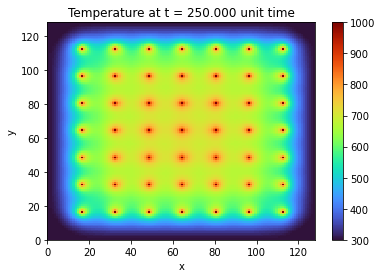

In [14]:
plate_length = 128
max_iter_time = 1000    
    #U_k = U[0].copy()

alpha = 1
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.random.randint(200,400,(max_iter_time, plate_length, plate_length))


lin = np.arange(16, plate_length, 16)#np.linspace(plate_length*,plate_length*0.8,8)
x,y = np.meshgrid(lin,lin)
x,y = x.flatten(), y.flatten()
idx = (x*plate_length) + y
heater_idx = np.int16(idx)

# Boundary condition positions
idx_matrix = np.arange(0,plate_length**2).reshape(plate_length, plate_length)
idx_top = idx_matrix[(plate_length-1):, :][0]
idx_left = idx_matrix[:, :1][:,0]
idx_bottom = idx_matrix[:1, 1:][0]
idx_right = idx_matrix[:, (plate_length-1):][:,0]
boundary_idx = np.hstack([idx_top, idx_bottom, idx_left, idx_right])

# Get Laplacian matrix
A = laplacian2D(plate_length)#.toarray()
U = u.copy().reshape(max_iter_time,-1)

"""D = sp.diags(np.ones(plate_length*plate_length)*4, format="csr")
R = A-D
D_inv = sp.diags(np.ones(plate_length*plate_length)/4, format="csr")#linalg.inv(D)"""

U[:,heater_idx] = 1000
U[:,boundary_idx] = 300


def calculate(U):
    k_end=-1
    for k in range(0, max_iter_time-1, 1):
        U[k+1] = U[k] + gamma*A@U[k]
        U[:,heater_idx] = 1000
        U[:,boundary_idx] = 300
        if np.allclose(U[k+1], U[k], rtol=0.001):
            print("break after iteration", k)
            k_end = k
            break
    
    return U.reshape(max_iter_time, plate_length, plate_length),k_end


u,k = calculate(U)#.copy()
#print(u[-1])

plotheatmap(u[k], max_iter_time, delta_t)

#anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False, fargs=(u, delta_t))
#anim.save("heat_equation.gif")

# b) Fourier Transform

[0.         0.02454369 0.04908739 0.07363108 0.09817477 0.12271846
 0.14726216 0.17180585 0.19634954 0.22089323 0.24543693 0.26998062
 0.29452431 0.319068   0.3436117  0.36815539 0.39269908 0.41724277
 0.44178647 0.46633016 0.49087385 0.51541754 0.53996124 0.56450493
 0.58904862 0.61359232 0.63813601 0.6626797  0.68722339 0.71176709
 0.73631078 0.76085447 0.78539816 0.80994186 0.83448555 0.85902924
 0.88357293 0.90811663 0.93266032 0.95720401 0.9817477  1.0062914
 1.03083509 1.05537878 1.07992247 1.10446617 1.12900986 1.15355355
 1.17809725 1.20264094 1.22718463 1.25172832 1.27627202 1.30081571
 1.3253594  1.34990309 1.37444679 1.39899048 1.42353417 1.44807786
 1.47262156 1.49716525 1.52170894 1.54625263 1.57079633 1.59534002
 1.61988371 1.6444274  1.6689711  1.69351479 1.71805848 1.74260218
 1.76714587 1.79168956 1.81623325 1.84077695 1.86532064 1.88986433
 1.91440802 1.93895172 1.96349541 1.9880391  2.01258279 2.03712649
 2.06167018 2.08621387 2.11075756 2.13530126 2.15984495 2.18438

<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

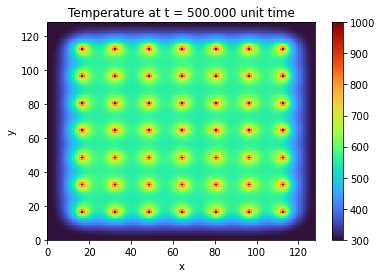

In [56]:
plate_length = 128
max_iter_time = 5000

alpha = 1
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.random.randint(200,400,(max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0#300

# Boundary conditions
u_top = 0#300.0
u_left = 0#300.0
u_bottom = 0#300.0
u_right = 0#300.0

lin = np.arange(16, plate_length, 16)#np.linspace(plate_length*,plate_length*0.8,8)
x,y = np.meshgrid(lin,lin)
x,y = x.flatten(), y.flatten()


#u.fill(u_initial)
# Set the initial condition
u[:,x, y] = 700

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

u0 = u.copy()

a = 1    # Thermal diffusivity constant
L = plate_length  # Length of domain
N = plate_length # Number of discretization points
dx = L/N
#x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = np.arange(0,N)*np.pi/plate_length##2*np.pi*np.fft.fftfreq(N, d=dx)
print(kappa)
kapx,kapy = np.meshgrid(kappa,kappa)
kap = kapx**2 + kapy**2

delta_t = 0.1

u[0] = u0[0]

for i in range(max_iter_time-1):
    u0hat = dst2(u[i])#np.fft.fft2(u[i]).copy()
    d_uhat = -a * kap * u0hat

    u0hat = u0hat + delta_t*d_uhat

    u[i+1] = idst2(u0hat)#np.fft.ifft2(u0hat).real#np.abs(np.fft.ifft2(u0hat))

    # Set the heater elements [np.pi*(k+1)*(n+1
    u[i+1 ,x, y] = 700

    # Set the boundary conditions
    u[i+1, (plate_length-1):, :] = u_top
    u[i+1, :, :1] = u_left
    u[i+1, :1, 1:] = u_bottom
    u[i+1, :, (plate_length-1):] = u_right

u += 300

plotheatmap(u[-1], max_iter_time, delta_t)

# b) Multigrid

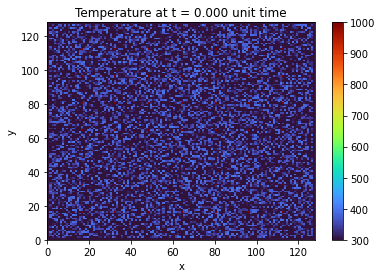

In [47]:
plate_length = 128
max_iter_time = 1000    

alpha = 1
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.random.randint(200,400,(plate_length, plate_length))


# Boundary conditions
u_top = 300.0
u_left = 300.0
u_bottom = 300.0
u_right = 300.0

lin = np.arange(16, plate_length, 16)#np.linspace(plate_length*,plate_length*0.8,8)
x,y = np.meshgrid(lin,lin)
x,y = x.flatten(), y.flatten()

# Set the initial condition
u[x, y] = 1000

# Set the boundary conditions
u[(plate_length-1):, :] = u_top
u[:, :1] = u_left
u[:1, 1:] = u_bottom
u[:, (plate_length-1):] = u_right



plotheatmap(u, 0, delta_t)
plt.show()

def restrict(u):
    m,n = u.shape[0]//2, u.shape[1]//2
    u_new = np.zeros((m, n))
    print(x,y)
    x_new, y_new = np.int16(x/2), np.int16(y/2)
    print(x_new, y_new)
    
    for i in range(m):
        for j in range(n):
            u_new[i,j] = u[i*2, j*2]
            
    # Set the initial condition
    u_new[x_new, y_new] = 1000

    # Set the boundary conditions
    u_new[(m-1):, :] = u_top
    u_new[:, :1] = u_left
    u_new[:1, 1:] = u_bottom
    u_new[:, (n-1):] = u_right
    
    return u_new.copy(), x_new.copy(), y_new.copy()

def prolongate(u):
    m,n = u.shape[0]*2, u.shape[1]*2
    u_new = np.zeros((m, n))
    x_new, y_new = x*2, y*2
    
    # Set the initial condition
    u_new[x_new, y_new] = 1000

    # Set the boundary conditions
    u_new[(m-1):, :] = u_top
    u_new[:, :1] = u_left
    u_new[:1, 1:] = u_bottom
    u_new[:, (n-1):] = u_right
    
    
    for i in range(2,m-2):
        for j in range(2,n-2):
            u_new[i,j] = (u[int(np.floor((i+1)/2)), int(np.floor((j+1)/2))]
                          + u[int(np.ceil((i+1)/2)), int(np.floor((j+1)/2))]
                          + u[int(np.floor((i+1)/2)), int(np.ceil((j+1)/2))]
                          + u[int(np.ceil((i+1)/2)), int(np.ceil((j+1)/2))])/4
    return u_new.copy(), x_new.copy(), y_new.copy()

    
def jacobi_step(u,x,y):
    m,n = u.shape[0], u.shape[1]
    for i in range(1, m-1, delta_x):
        for j in range(1, n-1, delta_x):
            u[x, y] = 1000
            u[i, j] = gamma * (u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]) + u[i][j]
    return u

def calculate(u,x,y, jacobi_steps = 3):
    for k in range(jacobi_steps):
        u = jacobi_step(u,x,y)
    u,x,y = restrict(u)
    for k in range(jacobi_steps):
        u = jacobi_step(u,x,y)
    u,x,y = restrict(u)    
    for k in range(jacobi_steps):
        u = jacobi_step(u,x,y)
    u,x,y = prolongate(u)
    for k in range(jacobi_steps):
        u = jacobi_step(u,x,y)
    u,x,y = prolongate(u)
    for k in range(jacobi_steps):
        u = jacobi_step(u,x,y)
    return u

#u = calculate(u,x,y, 10)
#plotheatmap(u, 0, delta_t)
#anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False, fargs=(u, delta_t))

[ 16  32  48  64  80  96 112  16  32  48  64  80  96 112  16  32  48  64
  80  96 112  16  32  48  64  80  96 112  16  32  48  64  80  96 112  16
  32  48  64  80  96 112  16  32  48  64  80  96 112] [ 16  16  16  16  16  16  16  32  32  32  32  32  32  32  48  48  48  48
  48  48  48  64  64  64  64  64  64  64  80  80  80  80  80  80  80  96
  96  96  96  96  96  96 112 112 112 112 112 112 112]
[ 8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24
 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48
 56] [ 8  8  8  8  8  8  8 16 16 16 16 16 16 16 24 24 24 24 24 24 24 32 32 32
 32 32 32 32 40 40 40 40 40 40 40 48 48 48 48 48 48 48 56 56 56 56 56 56
 56]


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

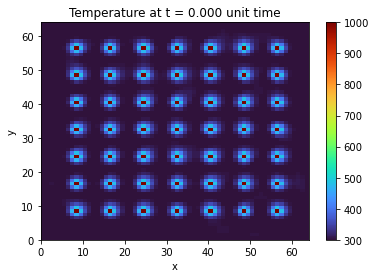

In [48]:
jacobi_steps = 10
for k in range(jacobi_steps):
    u = jacobi_step(u,x,y)
u,x,y = restrict(u)
plotheatmap(u,0, delta_t)


[ 8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24
 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48 56  8 16 24 32 40 48
 56] [ 8  8  8  8  8  8  8 16 16 16 16 16 16 16 24 24 24 24 24 24 24 32 32 32
 32 32 32 32 40 40 40 40 40 40 40 48 48 48 48 48 48 48 56 56 56 56 56 56
 56]
[ 4  8 12 16 20 24 28  4  8 12 16 20 24 28  4  8 12 16 20 24 28  4  8 12
 16 20 24 28  4  8 12 16 20 24 28  4  8 12 16 20 24 28  4  8 12 16 20 24
 28] [ 4  4  4  4  4  4  4  8  8  8  8  8  8  8 12 12 12 12 12 12 12 16 16 16
 16 16 16 16 20 20 20 20 20 20 20 24 24 24 24 24 24 24 28 28 28 28 28 28
 28]


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

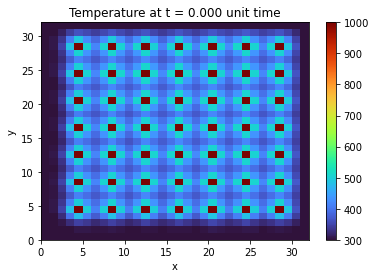

In [49]:

for k in range(jacobi_steps):
    u = jacobi_step(u,x,y)
u,x,y = restrict(u)    
plotheatmap(u,0, delta_t)


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

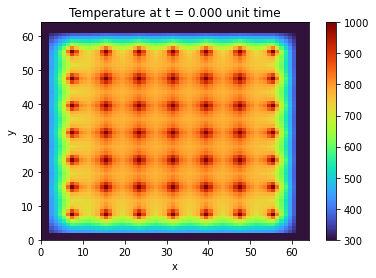

In [50]:

for k in range(jacobi_steps):
    u = jacobi_step(u,x,y)
u,x,y = prolongate(u)
plotheatmap(u,0, delta_t)


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

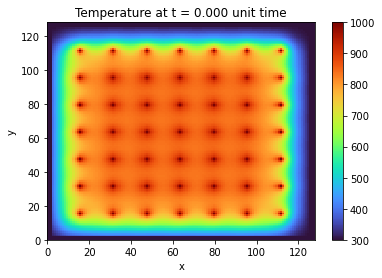

In [51]:

for k in range(jacobi_steps):
    u = jacobi_step(u,x,y)
u,x,y = prolongate(u)
plotheatmap(u,0, delta_t)


<module 'matplotlib.pyplot' from '/home/max/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

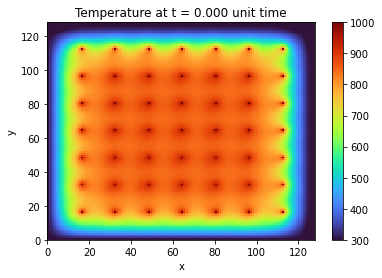

In [52]:

for k in range(jacobi_steps):
    u = jacobi_step(u,x,y)
plotheatmap(u,0, delta_t)